In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('heart_disease_uci.csv')

print(df.head())
print(df.info())
print(df.isnull().sum())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [2]:
df.rename(columns={'num': 'target'}, inplace=True)

df.replace({'?': np.nan, '': np.nan}, inplace=True)

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [17]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

df['target'] = (df['target'] > 0).astype(int)

C:\Users\daudr\AppData\Local\Temp\ipykernel_25824\2581551736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
C:\Users\daudr\AppData\Local\Temp\ipykernel_25824\2581551736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

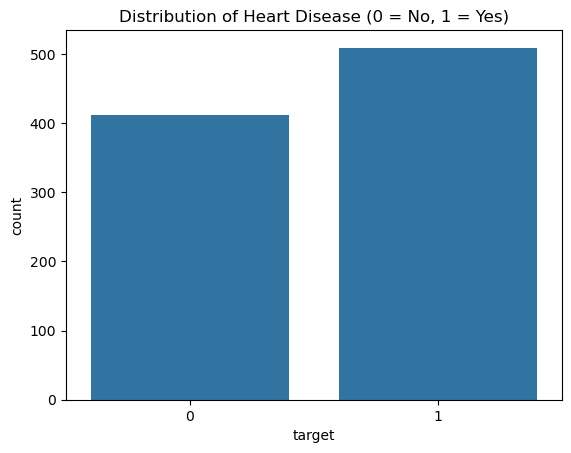

In [5]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

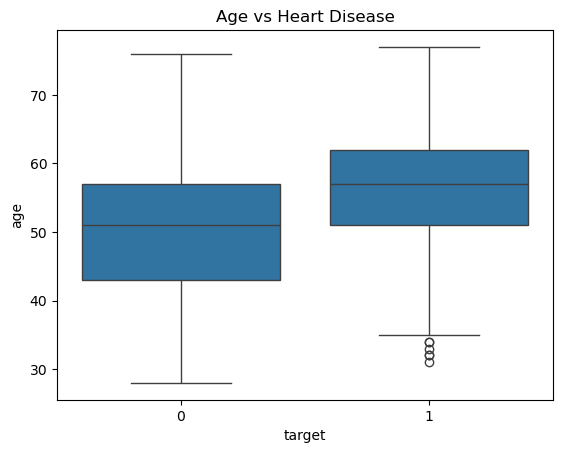

In [20]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

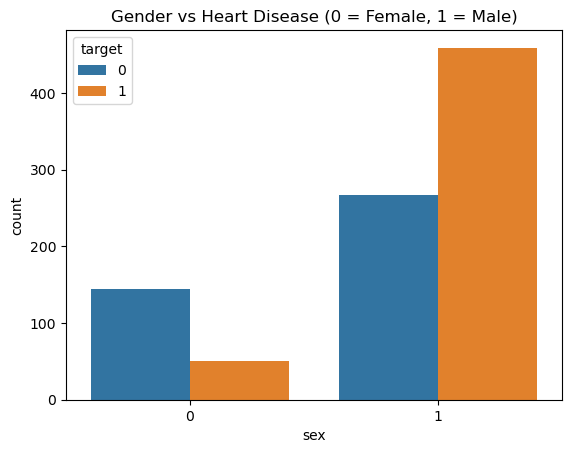

In [22]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs Heart Disease (0 = Female, 1 = Male)')
plt.show()

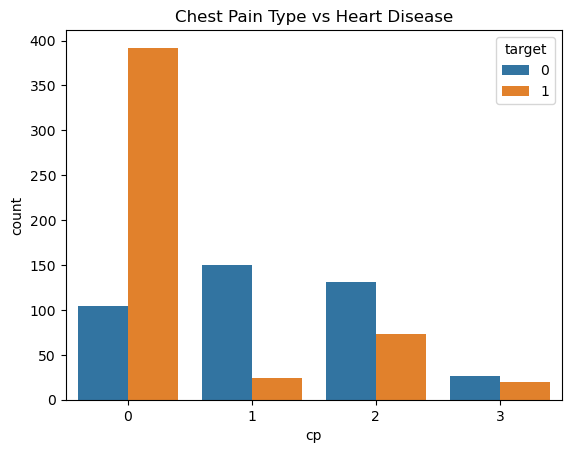

In [23]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

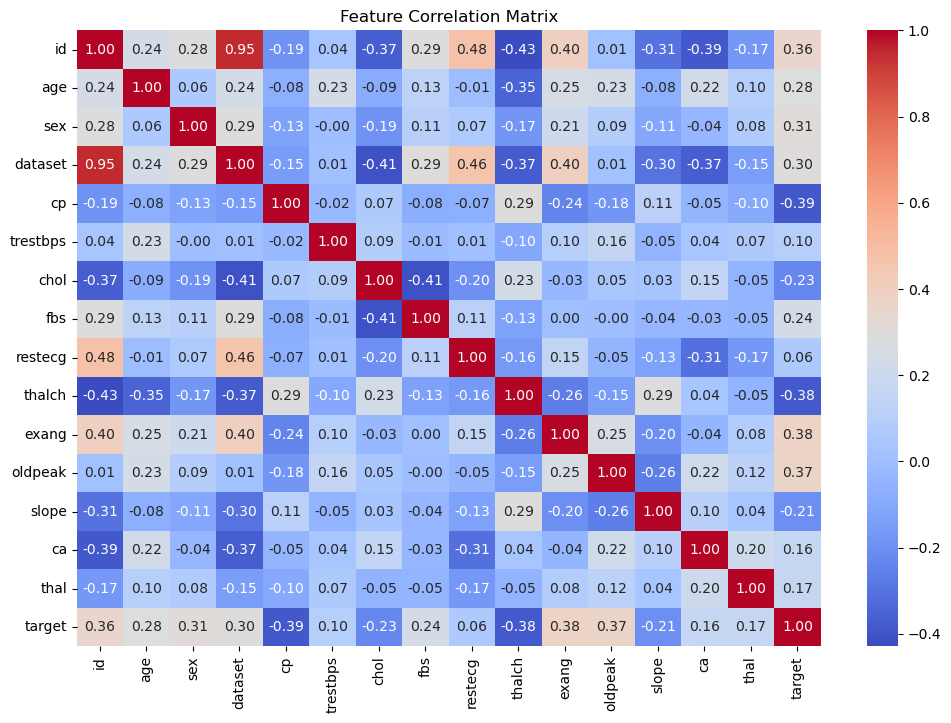

In [9]:
le = LabelEncoder()
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [16]:
X = df.drop(['id', 'target'], axis=1)  
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8478


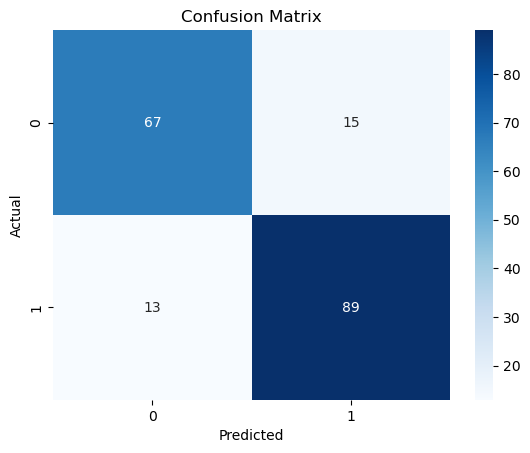

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



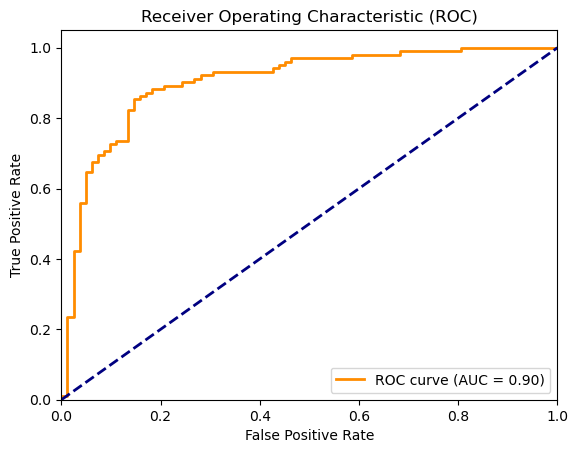

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [15]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})
feature_importance['abs_coeff'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coeff', ascending=False)

print(feature_importance)

     feature  coefficient  abs_coeff
12        ca     1.031085   1.031085
1        sex     0.978973   0.978973
6        fbs     0.649661   0.649661
10   oldpeak     0.618825   0.618825
9      exang     0.613638   0.613638
3         cp    -0.586258   0.586258
13      thal     0.539476   0.539476
2    dataset     0.247008   0.247008
11     slope    -0.245480   0.245480
7    restecg    -0.152661   0.152661
8     thalch    -0.017070   0.017070
0        age     0.014376   0.014376
4   trestbps     0.008202   0.008202
5       chol    -0.002254   0.002254
